In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from gwaxion import physics

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

cmap = 'magma'

In [3]:
reload(physics)

<module 'gwaxion.physics' from '/home/misi/.local/lib/python2.7/site-packages/gwaxion/physics.pyc'>

Imagine we are targeting a specific black hole with initial known mass ($60 M_\odot$) and spin (0.7):

In [4]:
bh = physics.BlackHole(mass=60, chi=0.7, msun=True)

For concreteness, also assume a distance of 5 Mpc:

In [5]:
distance = 5E6 * physics.PC_SI

Let's obtain and plot GW amplitudes and frequencies for a range of $\alpha$'s:

In [6]:
h0rs_num, fgws_num, alphas = bh.scan_alphas(alpha_min=0.01, alpha_max=0.25, delta_alpha=0.01, verbose=True)

# h0rs are the amplitudes 1m away from the source, so rescale by actual distance
h0s_num = h0rs_num / distance

100%|██████████| 24/24 [00:02<00:00,  8.86it/s]


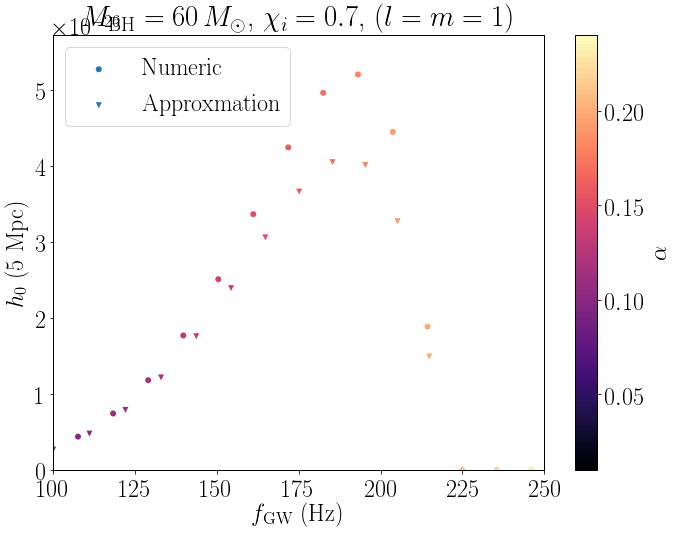

In [9]:
# an equivalent way to produce the above plot is
h0s_2, fgws_2 = physics.h0_scalar_brito(bh.mass_msun, alphas, chi_i=bh.chi, d=distance)

fig, ax = plt.subplots(1, figsize=(11,8))
ax.scatter(fgws_num, h0s_num, c=alphas, edgecolor='none', label='Numeric', cmap=cmap)
s = ax.scatter(fgws_2, h0s_2, c=alphas, edgecolor='none', label='Approxmation', cmap=cmap, marker='v')#, vmin=0, vmax=0.25)
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_xlim(100, 250)
ax.set_ylim(0, max(np.nanmax(h0s_2)*1.1, np.nanmax(h0s_num)*1.1))
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
ax.set_title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
ax.legend(loc="upper left", numpoints=1)
plt.show(fig)

100%|██████████| 49/49 [00:04<00:00, 11.95it/s]


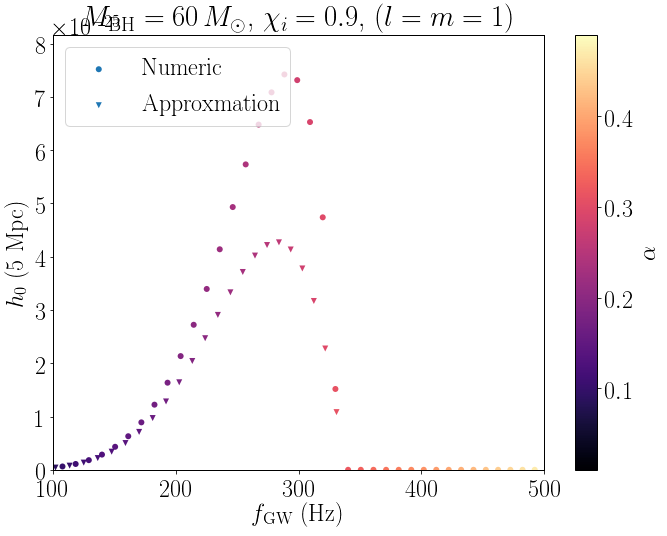

In [29]:
# let's try this for differen parameters

bh = physics.BlackHole(mass=60, chi=0.9, msun=True)

h0rs_num, fgws_num, alphas = bh.scan_alphas(alpha_min=0.01, alpha_max=0.5, delta_alpha=0.01, verbose=True)

# h0rs are the amplitudes 1m away from the source, so rescale by actual distance
h0s_num = h0rs_num / distance

h0s_2, fgws_2 = physics.h0_scalar_brito(bh.mass_msun, alphas, chi_i=bh.chi, d=distance)

fig, ax = plt.subplots(1, figsize=(11,8))
ax.scatter(fgws_num, h0s_num, c=alphas, edgecolor='none', label='Numeric', cmap=cmap)
s = ax.scatter(fgws_2, h0s_2, c=alphas, edgecolor='none', label='Approxmation', cmap=cmap, marker='v')#, vmin=0, vmax=0.25)
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_xlim(100, 500)
ax.set_ylim(0, max(np.nanmax(h0s_2)*1.1, np.nanmax(h0s_num)*1.1))
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
ax.set_title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.9$, $(l=m=1)$")
ax.legend(loc="upper left", numpoints=1)
plt.show(fig)


Instead of creating an array of amplitudes, we could have used the internal numerical fit available through the `BlackHole` object:

In [ ]:
fig, ax = plt.subplots(1, figsize=(11,8))
s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', label='Numeric (scatter)', cmap=cmap)
ax.plot(fgws, bh.h0r_fit(fgws)/distance, lw=2, color='k', alpha=0.5, label="Numeric (fit)")
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_ylim(0, max(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
ax.legend(loc="upper left", fontsize=20)
plt.show()
plt.show(ax)

We can compare this to the analytic approximation by Arvanitaki et al.:

In [ ]:
h0r_approx, fgws2 = physics.h0_scalar_approx(alphas, m_bh=bh.mass_msun)

fig, ax = plt.subplots(1, figsize=(11,8))

s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', cmap=cmap, s=50)#, vmin=0)#, vmax=0.2, s=50)
#ax.plot(fgws, bh.h0r_fit(fgws)/distance, lw=2, color='k', alpha=0.5, label="Numeric (fit)")
ax.plot(fgws2, h0r_approx/distance, lw=3, color='gray', ls='--', alpha=0.7, label="Arvanitaki+")

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="50%", height="5%", loc=2)
cb_ticks = np.linspace(0, 0.2, 5)
cb = plt.colorbar(s, label=r'$\alpha$', ticks=cb_ticks, orientation='horizontal', cax=cbaxes)

ax.set_ylim(0, 4E-26)
ax.set_xlim(0, 250)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
ax.legend(loc=3, frameon=False, fontsize=22)#loc="center", bbox_to_anchor=(0.25, 0.75))

ax.annotate(r'$M=60 M_\odot$'+'\n'+r'$\chi=0.7$', xy=(0.3, 0.5), xycoords="axes fraction", 
            ha='center', va='center', fontsize=36, color='gray')

#plt.title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.show(ax)

#fig.savefig("scat_h0_fgw_alpha.pdf", bbox_inches='tight')

In [ ]:
print alphas[h0s.max()==h0s]
print fgws[h0s.max()==h0s]
print h0s.max()

In [ ]:
a = physics.Alpha(alpha=alphas[h0s.max()==h0s], m_bh=60)
a.m_b_ev